In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import BertTokenizer, RobertaTokenizer

Definir o tokenizador para contagem de tokens

In [2]:

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


d:\tcc2\guilherme\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
DATA_PATH = "D:/tcc2/guilherme/2_Web_Scrapping/data/reviews_movies_scraper2.csv"
df = pd.read_csv(DATA_PATH)
df = df[['review','rating']]
df


,review,rating
0,This movie takes place off in fantasy land som...,1
1,"Too sentimental, too pathetic, too slow, too c...",1
2,There are some things in this life we will nev...,1
3,This movie was inspired by the brilliant Stir ...,1
4,"For the life of me, I can't understand all the...",1
...,...,...
44319,"This Movie leaves you in awe. Love, romance, l...",10
44320,"OK, Gangs of Wasseypur. Let me indulge in a fe...",10
44321,"This movie is just brilliant. Brilliant story,...",10
44322,Class apart... Everything !! Talk about screen...,10


In [4]:
def get_qtd_tokens(x, tokenizer):
    tokens = tokenizer.tokenize(x)
    return len(tokens)

In [5]:
df.loc[:, 'qtd_tokens_bert'] = df['review'].apply(lambda x: get_qtd_tokens(x, bert_tokenizer))


In [6]:
df.loc[:, 'qtd_tokens_roberta'] = df['review'].apply(lambda x: get_qtd_tokens(x, roberta_tokenizer))

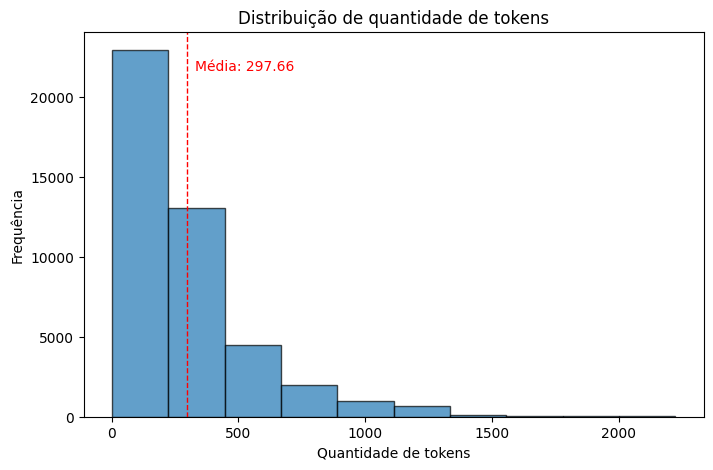

roberta


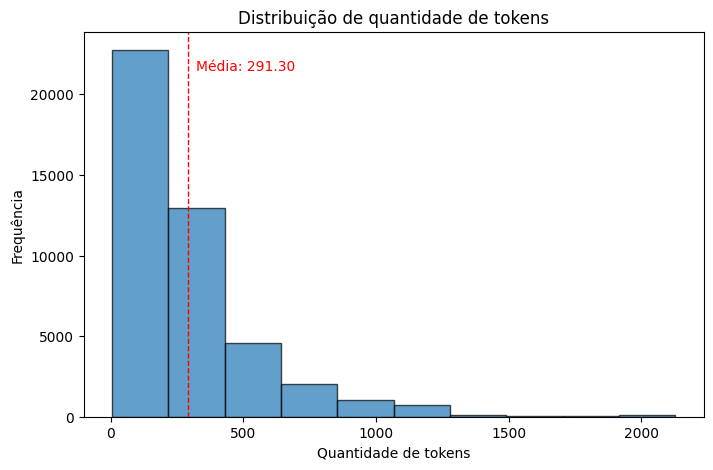

In [7]:

def plot_distr_qtd_palavras(series,title):
    mean_length = series.mean()

    plt.figure(figsize=(8, 5))
    plt.hist(series, edgecolor="k", alpha=0.7)
    plt.axvline(mean_length, color="r", linestyle="dashed", linewidth=1)
    plt.text(
        x=mean_length * 1.1,
        y=plt.ylim()[1] * 0.9,
        s=f"Média: {mean_length:.2f}",
        color="r",
    )
    plt.title(title)
    plt.xlabel("Quantidade de tokens")
    plt.ylabel("Frequência")
    plt.show()
# Agora você pode usar sua função para plotar a distribuição
title= "Distribuição de quantidade de tokens"
plot_distr_qtd_palavras(df['qtd_tokens_bert'], title)
print("roberta")
plot_distr_qtd_palavras(df['qtd_tokens_roberta'], title)


In [8]:
print("bert max tokens:",max(df['qtd_tokens_bert']))
print("bert min tokens:",min(df['qtd_tokens_bert']))

bert max tokens: 2223
bert min tokens: 1


In [9]:
print("bert max tokens:",max(df['qtd_tokens_roberta']))
print("bert min tokens:",min(df['qtd_tokens_roberta']))

bert max tokens: 2129
bert min tokens: 4


In [10]:
df

,review,rating,qtd_tokens_bert,qtd_tokens_roberta
0,This movie takes place off in fantasy land som...,1,78,77
1,"Too sentimental, too pathetic, too slow, too c...",1,41,41
2,There are some things in this life we will nev...,1,395,371
3,This movie was inspired by the brilliant Stir ...,1,162,165
4,"For the life of me, I can't understand all the...",1,109,103
...,...,...,...,...
44319,"This Movie leaves you in awe. Love, romance, l...",10,30,31
44320,"OK, Gangs of Wasseypur. Let me indulge in a fe...",10,427,403
44321,"This movie is just brilliant. Brilliant story,...",10,161,159
44322,Class apart... Everything !! Talk about screen...,10,29,26


In [11]:
def remove_outliers(df, column):
    # Calcular o IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remover outliers
    df_without_outliers = df[
        (df[column] >= lower_bound) & (df[column] <= upper_bound)
    ]

    return df_without_outliers


Sem outliers


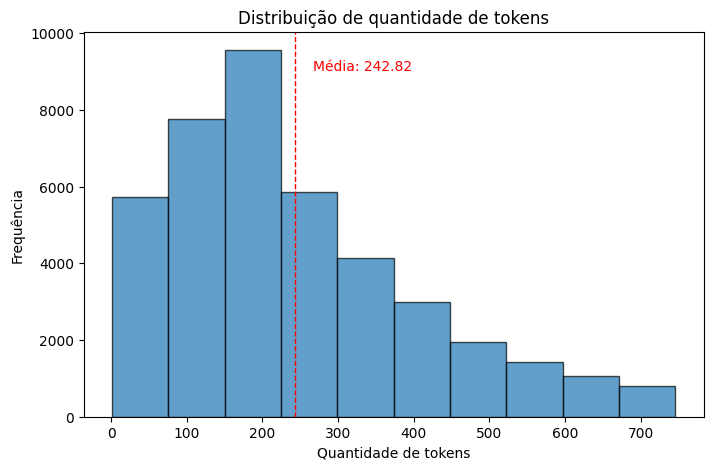

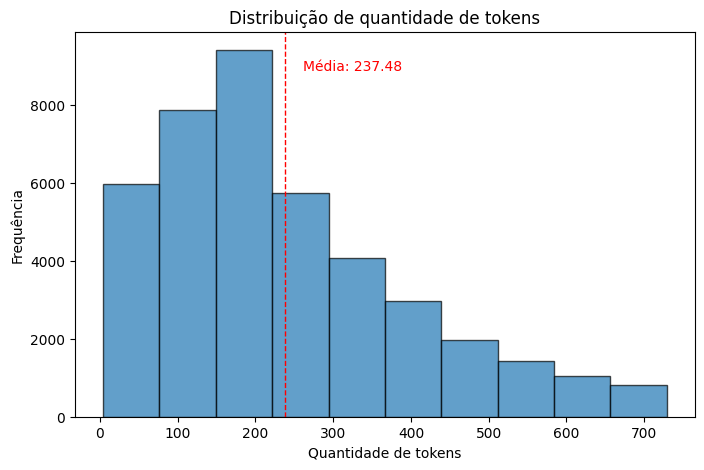

In [12]:

# Uso da função
df_without_outliers_bert = remove_outliers(df, "qtd_tokens_bert")
df_without_outliers_roberta = remove_outliers(df, "qtd_tokens_roberta")

print("Sem outliers")
title = "Distribuição de quantidade de tokens"
plot_distr_qtd_palavras(df_without_outliers_bert['qtd_tokens_bert'],title)
plot_distr_qtd_palavras(df_without_outliers_roberta['qtd_tokens_roberta'],title)
